# Project Name: Crime Data Analysis over the years in the states of USA
### Designed By:
    1. Manasi Joshi (mbjoshi2)
    2. Shruti Deekshitula (shrutid4)

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact, widgets, fixed
%matplotlib inline

Please note - "dataset_final.csv" is very large (1.5GB). This file cannot be uploaded to git. However, we have uploaded a sample file for reference of the fields and values present for the fields. 

Below we have processed the data into required dataframes for further analysis and saved them to .csv files which are later used in the analysis. These files can be downloaded and the chunks can be run on the viewer/user end.  

In [2]:
df_data = pd.read_csv("dataset_final.csv")
df_data.tail()

,incident_id,month_num,data_year,state_abbr,crime_against,age_num,sex_code,weapon_name,race_desc
62956029,121929614,10,2019,WV,Person,20,M,Unarmed,Asian
62956030,111875588,4,2019,WV,Society,28,M,Unarmed,Native Hawaiian or Other Pacific Islander
62956031,119275455,9,2019,WV,Property,39,M,Unarmed,Native Hawaiian or Other Pacific Islander
62956032,112118964,5,2019,WV,Person,46,M,Unarmed,Native Hawaiian or Other Pacific Islander
62956033,121930527,11,2019,WV,Person,31,M,Rifle (Automatic),Native Hawaiian or Other Pacific Islander


In [ ]:
sample_df = df_data.loc[:400000].copy()
sample_df.to_csv("final_datasets\sample_dataset_final.csv", index=False)

In [11]:
month_crimes = df_data.groupby(['state_abbr','data_year','month_num'])['incident_id'].count()
month_crimes = month_crimes.reset_index()
month_crimes.rename(columns= {'data_year':'year','month_num':'month', 'incident_id':'total_crimes'}, inplace=True)
month_crimes.to_csv("final_datasets\state_month_wise_crimes.csv", index= False)
month_crimes.head()

,state_abbr,year,month,total_crimes
0,AL,2006,1,375
1,AL,2006,2,327
2,AL,2006,3,389
3,AL,2006,4,375
4,AL,2006,5,433


In [12]:
def holiday_or_non(group):
    if group['month'] > 10 :
        return "holiday"
    else:
        return "non-holiday"
    
    
month_crimes['holiday']= month_crimes.apply(lambda x : holiday_or_non(x), axis=1)

In [13]:
holiday_df = month_crimes.groupby(['state_abbr','year','holiday'])['total_crimes'].sum().reset_index()
holi_update = holiday_df.pivot(index = ['state_abbr','year'] ,columns=['holiday'], values = ['total_crimes'])
holi_update = holi_update.droplevel(0, axis=1)
holi_update['total'] = holi_update['holiday'] + holi_update['non-holiday'] 
holi_update.rename(columns={'total_crimes':'crimes'}, inplace=True)
holi_update.to_csv("final_datasets\holiday_months.csv")
holi_update.head()

holiday          holiday  non-holiday   total
state_abbr year                              
AL         2006    722.0       3917.0  4639.0
           2007    846.0       3916.0  4762.0
           2008    808.0       3821.0  4629.0
           2009    679.0       3691.0  4370.0
           2010    692.0       3460.0  4152.0

In [14]:
crime_against_df = df_data.groupby(['state_abbr','data_year','crime_against'])['incident_id'].count().reset_index()
crime_against_df.rename(columns={'incident_id':'num_crimes','data_year':'year'}, inplace=True)
crime_against_df = crime_against_df.pivot(index = ['state_abbr','year'] ,columns=['crime_against'], values = ['num_crimes'])
crime_against_df = crime_against_df.droplevel(0, axis=1)
crime_against_df.to_csv("final_datasets\crime_against.csv")
crime_against_df.head()

crime_against    Not a Crime  Person  Property  Society
state_abbr year                                        
AL         2006          NaN   782.0    3409.0    448.0
           2007          NaN   865.0    3524.0    373.0
           2008          NaN   867.0    3306.0    456.0
           2009          NaN   833.0    3008.0    529.0
           2010          NaN   848.0    2837.0    467.0

In [17]:
race_against_df = df_data.groupby(['data_year','state_abbr','race_desc'])['incident_id'].count().reset_index()
race_against_df.rename(columns={'incident_id':'num_crimes','data_year':'year'}, inplace=True)
race_against_df = race_against_df.pivot(index= [ 'state_abbr','year'], columns=['race_desc'], values = ['num_crimes'])
race_against_df = race_against_df.droplevel(0, axis = 1)
race_against_df = race_against_df[['American Indian or Alaska Native', 'Asian','Black or African American', 'White']]
race_against_df.fillna(0, axis =1 , inplace = True)
race_against_df[['American Indian or Alaska Native', 'Asian','Black or African American', 'White']] = race_against_df[['American Indian or Alaska Native', 'Asian','Black or African American', 'White']].astype("int64")

total_crimes = df_data.groupby(['data_year','state_abbr'])['incident_id'].count().reset_index()
total_crimes.rename(columns={'incident_id':'total_crimes','data_year':'year'}, inplace=True)

race_total_df = pd.merge(race_against_df, total_crimes, how = 'inner', left_on=['year','state_abbr'], right_on=['year','state_abbr'], right_index=False)
race_total_df.to_csv("final_datasets/race_against.csv", index=False)
race_total_df.head()

,year,state_abbr,American Indian or Alaska Native,Asian,Black or African American,White,total_crimes
0,2006,AL,932,892,1265,1542,4639
1,2007,AL,922,917,1346,1566,4762
2,2008,AL,889,908,1316,1506,4629
3,2009,AL,792,789,1203,1572,4370
4,2010,AL,734,771,1213,1428,4152


### All required files for hypothesis are generated. Below chucnks of code are available to run with the datasets present in the final_datasets folder. Can be used for further analysis and hypothesis

## Hypothesis 2 : 

In [18]:
race_against_df = pd.read_csv("final_datasets/race_against.csv")
race_against_df.head()

,year,state_abbr,American Indian or Alaska Native,Asian,Black or African American,White,total_crimes
0,2006,AL,932,892,1265,1542,4639
1,2007,AL,922,917,1346,1566,4762
2,2008,AL,889,908,1316,1506,4629
3,2009,AL,792,789,1203,1572,4370
4,2010,AL,734,771,1213,1428,4152


In [31]:
state_abbr = pd.read_csv("state_pop.csv", index_col= 0)
state_abbr['Total'] = state_abbr['Total'].astype("int64")
state_race_df = pd.merge( race_against_df, state_abbr, how = 'inner', left_on = ['state_abbr','year'], right_on = ['Code','Year'], right_index=False)
state_race_df.drop(columns = ['Code','Year','Total'], axis = 1, inplace=True)
state_race_df = state_race_df[['State','state_abbr','year','American Indian or Alaska Native','Asian','Black or African American','White','total_crimes']]
state_race_df.columns = state_race_df.columns.str.title()
state_race_df.head()

,State,State_Abbr,Year,American Indian Or Alaska Native,Asian,Black Or African American,White,Total_Crimes
0,Alabama,AL,2008,889,908,1316,1506,4629
1,Alabama,AL,2009,792,789,1203,1572,4370
2,Alabama,AL,2010,734,771,1213,1428,4152
3,Alabama,AL,2011,769,742,1234,1367,4123
4,Alabama,AL,2012,719,711,1202,1395,4035


In [32]:
election_df = pd.read_excel("final_datasets/election.xlsx")
election_df.reset_index(inplace=True)
election_df.columns = election_df.columns.str.lower()
election_race_df = pd.merge(state_race_df, election_df, how = 'inner', left_on=['State','year'], right_on=['state','year'], right_index=False)
election_race_df.head()

,state_abbr,year,American Indian or Alaska Native,Asian,Black or African American,White,State,Total,Year,Code,index,state,elected_party_state,elected_party_center
0,AL,2008,889,908,1316,1506,Alabama,4526900,2008,AL,0,Alabama,Repulican,Democratic
1,AL,2009,792,789,1203,1572,Alabama,4569100,2009,AL,51,Alabama,Repulican,Democratic
2,AL,2010,734,771,1213,1428,Alabama,4651400,2010,AL,102,Alabama,Repulican,Democratic
3,AL,2011,769,742,1234,1367,Alabama,4676000,2011,AL,153,Alabama,Repulican,Democratic
4,AL,2012,719,711,1202,1395,Alabama,4696000,2012,AL,204,Alabama,Repulican,Democratic


In [28]:
drp_dwn = widgets.Dropdown(value='Total Individuals Vaccinated',
        options=[('# vaccinated', 'Total Individuals Vaccinated'),
                ('% vaccinated', 'VaccinationRate')])
interact(plot, y = drp_dwn, df = fixed(rateOfVaccination_vs_party[0]))

,index,state,elected_party_state,year,elected_party_center
0,0,Alabama,Repulican,2008,Democratic
1,1,Alaska,Repulican,2008,Democratic
2,2,Arizona,Repulican,2008,Democratic
3,3,Arkansas,Repulican,2008,Democratic
4,4,California,Democratic,2008,Democratic


## Hypothesis 3 : Crime rates during holiday season are more compared to non-holiday season
#### We are extending this from the analysis from the below article Reference: https://www.alarms.org/holiday-crime-rankings-by-state/

In [2]:
# crimes during holiday months
df = pd.read_csv("final_datasets/state_month_wise_crimes.csv")
holiday_months  = df.groupby(['year','month'])['total_crimes'].sum()
holiday_months = holiday_months.reset_index()

In [3]:
def draw_graph(ax, df, year):
    dates = np.array(df["date"].tolist())
# print(dates)
    returns = np.array(df["total_crimes"].tolist())

    doublediff = np.diff(np.sign(np.diff(returns)))
    peak_locations = np.where(doublediff == -2)[0] + 1

    doublediff2 = np.diff(np.sign(np.diff(-1*returns)))
    trough_locations = np.where(doublediff2 == -2)[0] + 1

    ax.plot(dates, returns, "-.")
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_ylim(200000,500000)
    ax.set_xlabel("Month-Year",fontsize=12)
    ax.set_ylabel("Number of crimes",fontsize=12)
    ax.set_title("Number of crimes across months in the year "+str(year), fontsize=14, fontweight='bold')
#     ax.set_yticks(np.arange(200000,500000, 10000))
    ax.scatter(df.date.iloc[peak_locations], df.total_crimes.iloc[peak_locations], marker="o", color='tab:grey', s=100, label='Peaks')
    ax.scatter(df.date.iloc[trough_locations], df.total_crimes.iloc[trough_locations], marker="o", color='tab:grey', s=100, label='Troughs')

    p_len = len(peak_locations)
    t_len = len(trough_locations)

    if p_len > t_len:
        r = p_len - t_len
        for i in range(r):
            trough_locations = np.append(trough_locations,[trough_locations[-1]])

    elif t_len > p_len:
        r = t_len - p_len
        for i in range(r):
            peak_locations = np.append(peak_locations,[peak_locations[-1]])

    for t, p in zip(trough_locations, peak_locations):
        ax.text(df.date.iloc[p], df.total_crimes.iloc[p]+15, df.total_crimes.iloc[p], horizontalalignment='left', color='k')
        ax.text(df.date.iloc[t], df.total_crimes.iloc[t], df.total_crimes.iloc[t], horizontalalignment='left', color='k')

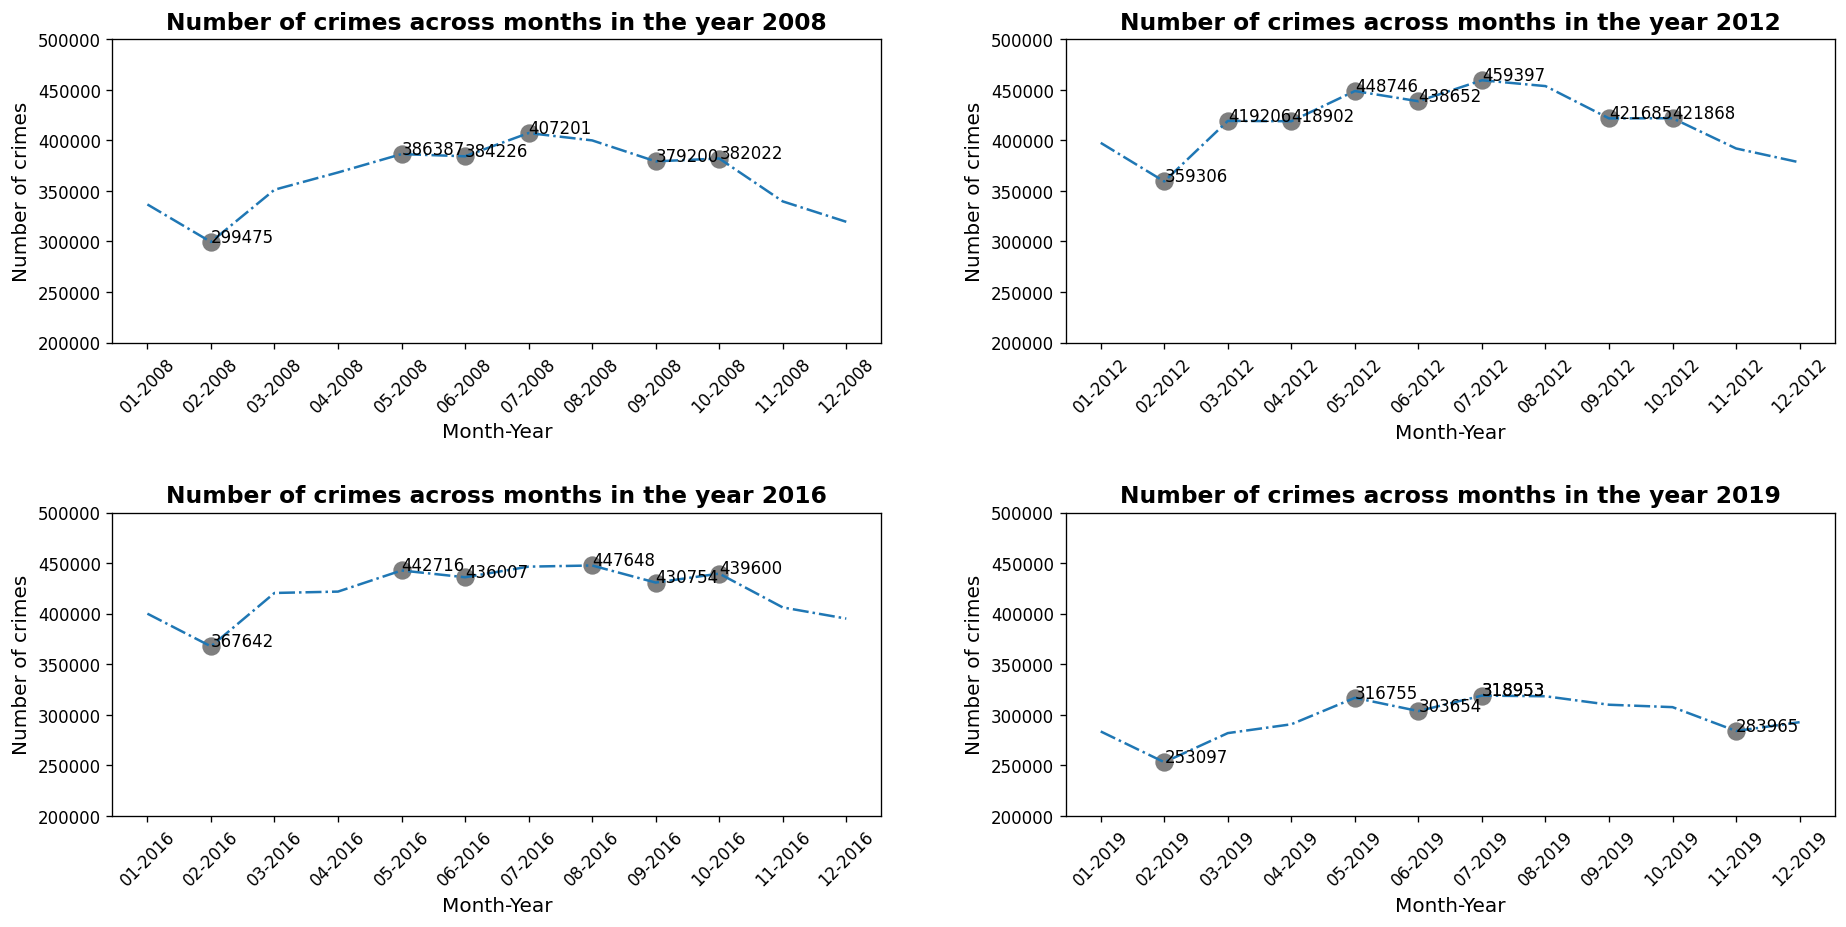

In [4]:
# Plotting graphs for years to visuzalize the crimes during every month of the year and determin if the crime number was higher 
# during holiday months (11, 12)

year_list  = [2008, 2012, 2016, 2019]

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(17,9), dpi= 120)

fig.tight_layout(pad=8.0)
axes = [ax0, ax1, ax2, ax3]

for i in range(len(year_list)):
    year_df = holiday_months[holiday_months['year'] == year_list[i]].copy()
#     print(year_df)
    year_df['date'] = year_df['month'].map(str)+ '-' +year_df['year'].map(str)
    year_df['date'] = pd.to_datetime(year_df['date'], format='%m-%Y').dt.strftime('%m-%Y')
    draw_graph(axes[i], year_df, year_list[i])

plt.show()


#### Based on the above visualizations

#### Hypothesis 3 : Proved False - Crime rates during holiday season are not higher as compared to non-holiday season    


#### Furher analyzing the crime score in states for the user input years. Reference from the paper  https://www.alarms.org/holiday-crime-rankings-by-state/

In [5]:
h_df = pd.read_csv("holiday_months.csv")
h_df.head()

,state_abbr,year,holiday,non-holiday,total
0,AL,2006,722.0,3917.0,4639.0
1,AL,2007,846.0,3916.0,4762.0
2,AL,2008,808.0,3821.0,4629.0
3,AL,2009,679.0,3691.0,4370.0
4,AL,2010,692.0,3460.0,4152.0


In [6]:
c_df = pd.read_csv("crime_against.csv")
c_df.head()

,state_abbr,year,Not a Crime,Person,Property,Society
0,AL,2006,NaN,782.0,3409.0,448.0
1,AL,2007,NaN,865.0,3524.0,373.0
2,AL,2008,NaN,867.0,3306.0,456.0
3,AL,2009,NaN,833.0,3008.0,529.0
4,AL,2010,NaN,848.0,2837.0,467.0


In [8]:
# Merge the state-wise population and number of crimes during holiday, non-holiday, total crimes,crime agaisnt for years between 2008 -2019
final_df = pd.merge( h_df, state_abbr, how = 'inner', left_on = ['state_abbr','year'], right_on = ['Code','Year'], right_index=False)
final_df = pd.merge( c_df, final_df, how = 'inner', left_on = ['state_abbr','year'], right_on = ['Code','Year'], right_index=False)
final_df = final_df[['State','Code','Year','Total','holiday','non-holiday','Property','Person','Society','Not a Crime','total']]
final_df.head()
final_df = final_df[['State','Code','Year','Total','holiday','non-holiday','Property','Person','Society','Not a Crime','total']]
final_df.rename(columns=
                 {
                     'Total' : 'population',
                     'holiday' : 'holiday_crimes',
                     'non-holiday' : 'non_holi_crimes',
                     'Property' : 'property_crimes',
                     'Person' : 'person_crimes',
                     'Society' : 'society_crimes',
                     'Not a Crime' : 'not_crimes',
                     'total' : 'total_crimes'
                 }, inplace=True)
final_df[['holiday_crimes','non_holi_crimes','property_crimes','person_crimes','society_crimes','not_crimes','total_crimes']] = final_df[['holiday_crimes','non_holi_crimes','property_crimes','person_crimes','society_crimes','not_crimes','total_crimes']].fillna(0)
final_df[['holiday_crimes','non_holi_crimes','property_crimes','person_crimes','society_crimes','not_crimes','total_crimes']] = final_df[['holiday_crimes','non_holi_crimes','property_crimes','person_crimes','society_crimes','not_crimes','total_crimes']].astype("int64")
final_df.head()

,State,Code,Year,population,holiday_crimes,non_holi_crimes,property_crimes,person_crimes,society_crimes,not_crimes,total_crimes
0,Alabama,AL,2008,4526900,808,3821,3306,867,456,0,4629
1,Alabama,AL,2009,4569100,679,3691,3008,833,529,0,4370
2,Alabama,AL,2010,4651400,692,3460,2837,848,467,0,4152
3,Alabama,AL,2011,4676000,714,3409,2912,758,453,0,4123
4,Alabama,AL,2012,4696000,710,3325,2783,844,408,0,4035


In [9]:
us_states = json.load(open("states.geojson", "r"))
us_states["features"]
state_id_map  = {}
for feature in us_states['features']:
    feature['id'] = feature['properties']['STATEFP']
    state_id_map[feature['properties']['STUSPS']] = feature['id'] 

In [10]:
final_df['State_Id'] = final_df['Code'].apply(lambda x : state_id_map[x])
final_df.head()

,State,Code,Year,population,holiday_crimes,non_holi_crimes,property_crimes,person_crimes,society_crimes,not_crimes,total_crimes,State_Id
0,Alabama,AL,2008,4526900,808,3821,3306,867,456,0,4629,01
1,Alabama,AL,2009,4569100,679,3691,3008,833,529,0,4370,01
2,Alabama,AL,2010,4651400,692,3460,2837,848,467,0,4152,01
3,Alabama,AL,2011,4676000,714,3409,2912,758,453,0,4123,01
4,Alabama,AL,2012,4696000,710,3325,2783,844,408,0,4035,01


#### To further analyze the data we referred the article from - https://www.alarms.org/holiday-crime-rankings-by-state/

In the article, crime score for each state was determined as follows - 
Crime score takes into account things like holiday arrests, a state’s population, gun ownership, and poverty, and assigns each state a holiday crime score.* The higher the score, the higher the rate of holiday crime.

We have tried to refer the above and score our crime data for the states that are present and have the crime data information from the official site. We then plotted the map as per the user input for years between 2008-2019 for each available state data to analyze which states in the US have higher rate of holiday crime.

In [11]:
def get_rank(df: pd.DataFrame, col: str) -> None:
    df[col+"_rank"] = df[col].rank()
    return None

In [12]:
def get_crime_score(df: pd.DataFrame, year: int) -> pd.DataFrame:
    df = final_df[final_df['Year'] == year].copy()
    columns = df.columns
    for col in columns[3:-1]:
        get_rank(df, col)

    rank_cols = df.columns[-8:]
    df['Total'] = np.zeros(len(df))
    for rank_col in rank_cols:
        df["Total"] += df[rank_col]
    # df.head()

    df['crime_score'] = round(df['Total'] / len(rank_cols),2)
    
    print("Data of the below states available for the year "+str(year))
    print(df['State'].unique().tolist())
    
    return df

In [15]:
def map_score(df):
    fig = px.choropleth(df, 
                    locations= 'State_Id', 
                    geojson=us_states, 
                    color='crime_score', 
                    scope='usa',
                    hover_name='State',
                    hover_data =['holiday_crimes'],
                    title = "State-wise crime rate score in the year " +str(year),
                    color_continuous_scale="Blues",
                    
                   )
    # focus only on the available states
    fig.update_geos(fitbounds="locations", visible=False)
#     fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
    fig.add_scattergeo(
      geojson=us_states,
      locations = df['State_Id'],
      text = df['State'],
        textposition= "middle center",
      mode = 'text') 
    fig.show()


In [16]:
year = int(input("Please enter the year"))
if year in range(2008, 2020):
    df = get_crime_score(final_df, int(year))
    map_score(df)
else:
    print("Please enter years only between 2008 - 2019")

Please enter the year2012
Data of the below states available for the year 2012
['Alabama', 'Arkansas', 'Arizona', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Iowa', 'Idaho', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maine', 'Michigan', 'Missouri', 'North Dakota', 'Nebraska', 'New Hampshire', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'West Virginia']


The crime rate was computed based on certain parameters, as specified in the reference article, and the state with the highest score is considered to be unsafe/risky over the holidays. In the case of a reference paper, Florida is the location.

However, we feel that a state's safety or the number of crimes committed during the holiday season in different states cannot be determined solely by scoring the dataset's available fields. There are a number of important considerations to be made. To summarize, the process and steps used in the reference paper to identify the higher risk states were a good estimate based on the available data, but they do not validate concrete conclusions for any state or year.